In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from matplotlib import style
style.use('seaborn')
%matplotlib inline

<ipython-input-1-941cb6d9f53c>:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use('seaborn')


In [2]:
orig = pd.read_csv("train.csv")

In [3]:
orig.head()

,Employee ID,Date of Joining,Gender,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,9/30/08,Female,2,3.0,3.8,0.16
1,fffe3700360033003500,11/30/08,Male,1,2.0,5.0,0.36
2,fffe31003300320037003900,3/10/08,Female,2,NaN,5.8,0.49
3,fffe32003400380032003900,11/3/08,Male,1,1.0,2.6,0.20
4,fffe31003900340031003600,7/24/08,Female,3,7.0,6.9,0.52


In [4]:
orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee ID           22750 non-null  object 
 1   Date of Joining       22750 non-null  object 
 2   Gender                22750 non-null  object 
 3   Designation           22750 non-null  int64  
 4   Resource Allocation   21369 non-null  float64
 5   Mental Fatigue Score  20633 non-null  float64
 6   Burn Rate             21626 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 1.2+ MB


In [5]:
orig.isna().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

In [6]:
data = orig.dropna()

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18590 entries, 0 to 22749
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee ID           18590 non-null  object 
 1   Date of Joining       18590 non-null  object 
 2   Gender                18590 non-null  object 
 3   Designation           18590 non-null  int64  
 4   Resource Allocation   18590 non-null  float64
 5   Mental Fatigue Score  18590 non-null  float64
 6   Burn Rate             18590 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 1.1+ MB


In [8]:
data.isna().sum()

Employee ID             0
Date of Joining         0
Gender                  0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
Burn Rate               0
dtype: int64

In [9]:
# Feature Engineering - Gender

def gender_encoder(data):
    if data["Gender"] == "Female":
        return 1
    return 0

data.loc[:, "Gender"] = data.apply(gender_encoder, axis=1)

# Feature Engineering - Date of Joining

current_date = pd.to_datetime('today')

def create_days_count(data):
    return (current_date - data["Date of Joining"])

data.loc[:, "Date of Joining"] = pd.to_datetime(data["Date of Joining"])

data.loc[:, "days_count"] = data.apply(create_days_count, axis=1)
data.loc[:, "days_count"] = data["days_count"].dt.days


# Feature Engineering - Mental Fatigue

def categorize_Fatigue(data):
    if data["Mental Fatigue Score"] <= 2.0:
        return 0
    if data["Mental Fatigue Score"] > 2.0 and data["Mental Fatigue Score"] <= 3.5:
        return 1
    if data["Mental Fatigue Score"] > 3.5 and data["Mental Fatigue Score"] <= 5.0:
        return 2
    if data["Mental Fatigue Score"] > 4.0 and data["Mental Fatigue Score"] <= 6.5:
        return 3
    if data["Mental Fatigue Score"] > 6.5 and data["Mental Fatigue Score"] <= 8.0:
        return 4
    if data["Mental Fatigue Score"] > 8.0:
        return 5
    return -1

data.loc[:, "Mental Fatigue Score"] = data.apply(categorize_Fatigue, axis=1)


<ipython-input-9-79fa7ad79779>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, "Gender"] = data.apply(gender_encoder, axis=1)
<ipython-input-9-79fa7ad79779>:8: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:, "Gender"] = data.apply(gender_encoder, axis=1)
<ipython-input-9-79fa7ad79779>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

In [10]:
df = data.drop(columns=["Date of Joining", "Employee ID"])
df.head()

,Gender,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,days_count
0,1,2,3.0,2,0.16,5500
1,0,1,2.0,2,0.36,5439
3,0,1,1.0,1,0.20,5466
4,1,3,7.0,4,0.52,5568
5,0,2,4.0,2,0.29,5443


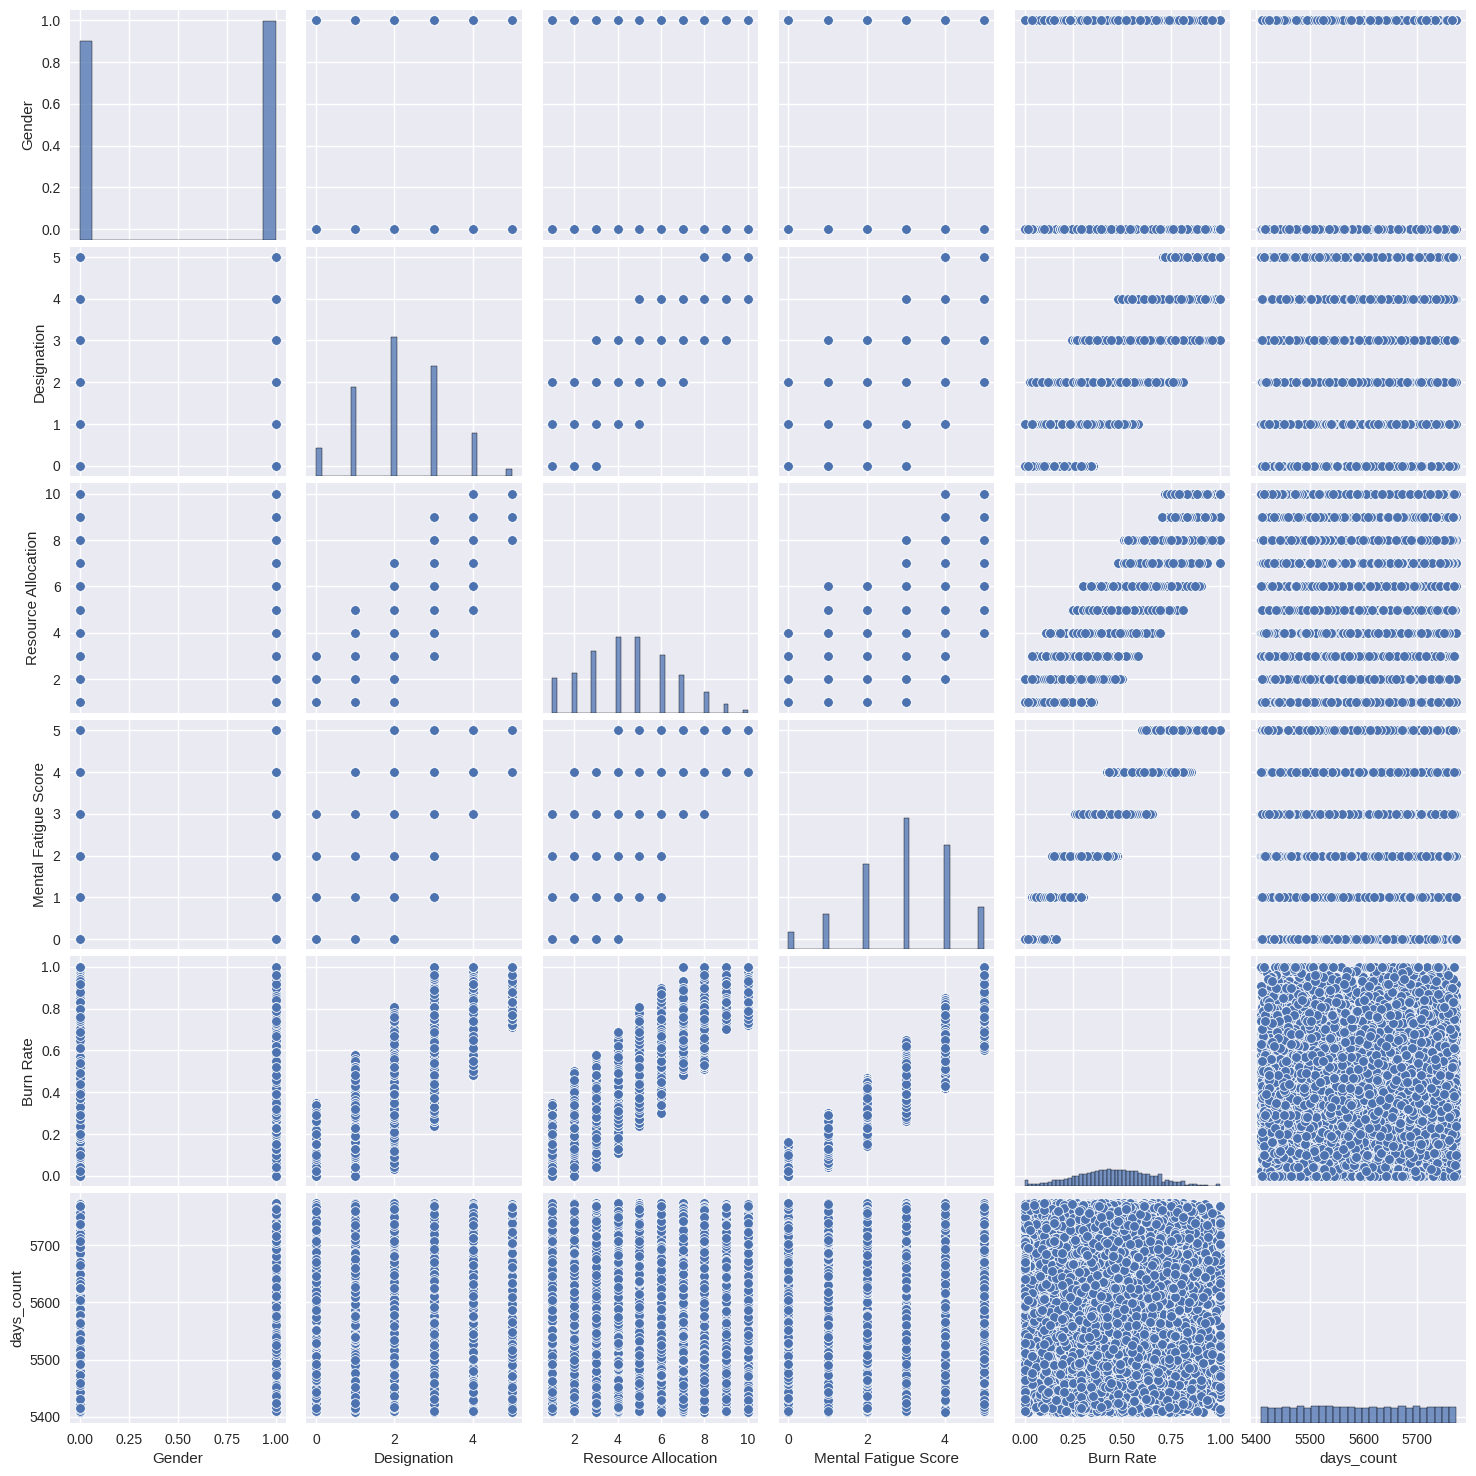

In [11]:
sns_plot = sns.pairplot(df, height=2.5)
sns_plot.savefig("pairplot.png")

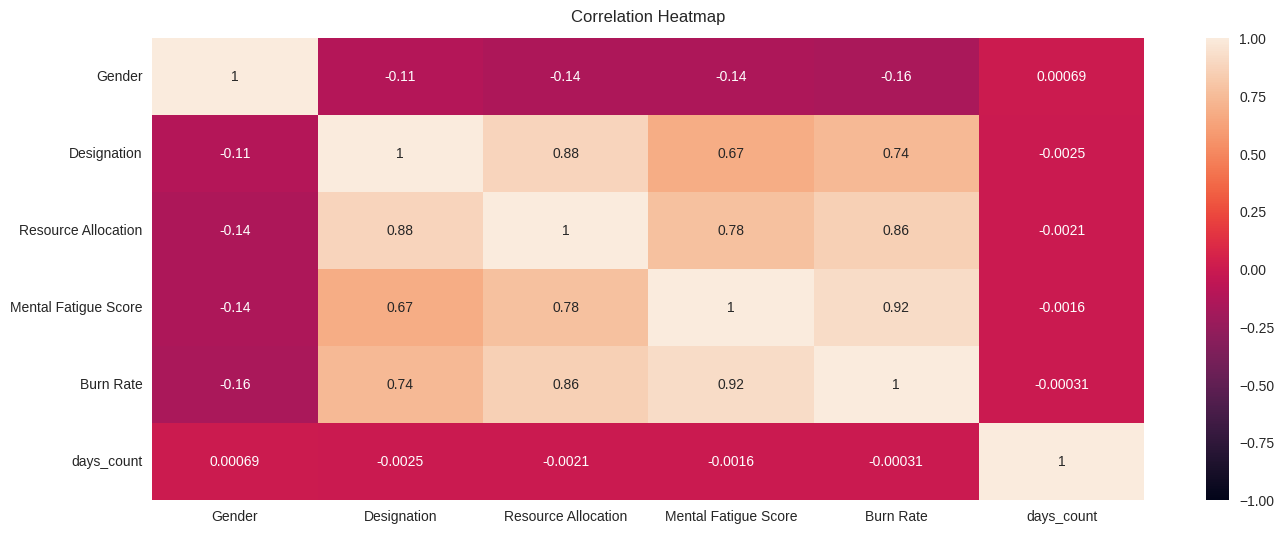

In [12]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);
plt.savefig("correlation_heatmap.png")

In [13]:
x = df.drop(columns=['Burn Rate'])
y = df['Burn Rate']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import xgboost
from sklearn.metrics import r2_score

In [15]:
def print_r2(y_train, train_pred, y_test, test_pred, model_str):

    r2_train = r2_score(y_train, train_pred)
    print(model_str + " R2 Train: "+str(round(100*r2_train, 4))+" %")

    r2_test = r2_score(y_test, test_pred)
    print(model_str + " R2 Test : "+str(round(100*r2_test, 4))+" %")

In [16]:
# Linear Regression Model

lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

train_pred_linear = lr_model.predict(x_train)
test_pred_linear = lr_model.predict(x_test)

In [17]:
print_r2(y_train, train_pred_linear, y_test, test_pred_linear, "LR")

LR R2 Train: 89.314 %
LR R2 Test : 89.104 %


In [18]:
# Random Forest Regression

rf_model = RandomForestRegressor()
rf_model.fit(x_train, y_train)

train_pred_rf = rf_model.predict(x_train)
test_pred_rf = rf_model.predict(x_test)

print_r2(y_train, train_pred_rf, y_test, test_pred_rf, "RF")

RF R2 Train: 96.6194 %
RF R2 Test : 85.6011 %


In [19]:
# XGBoost Regressor

# HyperParameter Tuning

xgb_reg = xgboost.XGBRegressor(nthread=-1, objective='reg:squarederror', seed=42)

params = {
    "learning_rate": [0.01, 0.1, 0.5, 1.0],
    "max_depth": [2, 3, 4, 5],
    "subsample": [0.1, 1.0, 0.5],
    "n_estimators": [100, 200, 400]
}

# search = RandomizedSearchCV(xgb_reg, params, n_jobs=-1, n_iter=40, cv=10, verbose=3, random_state=42);

search = GridSearchCV(xgb_reg, params, n_jobs=-1, cv = 10, verbose=3, return_train_score=True)

search.fit(x_train, y_train)
xgb_best_params = search.best_params_ # found best parameters

# Selected XGB Model

xgb_model = xgboost.XGBRegressor(
    n_estimators = xgb_best_params["n_estimators"] ,
    max_depth = xgb_best_params["max_depth"] ,
    learning_rate = xgb_best_params["learning_rate"],
    subsample = xgb_best_params["subsample"])

xgb_model.fit(x_train, y_train)

train_pred_xgb = xgb_model.predict(x_train)
test_pred_xgb = xgb_model.predict(x_test)

print(xgb_best_params)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits
{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 400, 'subsample': 1.0}


In [20]:
print_r2(y_train, train_pred_xgb, y_test, test_pred_xgb, "XGB")

XGB R2 Train: 90.2008 %
XGB R2 Test : 89.7891 %


In [21]:
# WILL USE XGB MODEL

final_model = xgb_model

print(final_model)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=400, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)


In [22]:
import pickle

In [23]:
pickle.dump(final_model, open('xgb_model.pkl', 'wb'))

In [29]:
print(type(x['days_count']))

<class 'pandas.core.series.Series'>
